# Hierarchical clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from scipy.cluster.hierarchy import linkage

In [2]:
airline = pd.read_csv("EastWestAirlines.csv")

In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airline.iloc[:,1:])

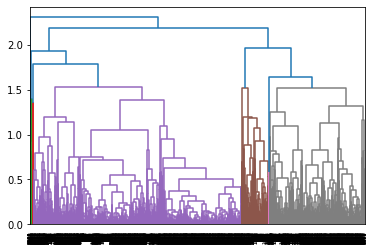

In [6]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [15]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=5)

In [16]:
# save clusters for chart
y = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y,columns=['Clusters'])

In [17]:
airline['h_clusterid'] = y

In [18]:
airline['h_clusterid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: h_clusterid, dtype: int64

In [19]:
airline.head

<bound method NDFrame.head of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0  

In [20]:
airline.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1889.710359,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,1567.278932,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,1877.870050,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,1490.760748,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,3390.846924,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


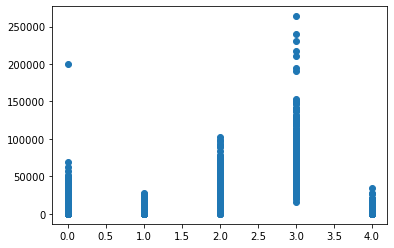

In [24]:
#plot cluster
plt.scatter(airline['h_clusterid'],airline['Bonus_miles'])

# K-Means clustering

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [7]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline = scaler.fit_transform(airline.iloc[:,1:])

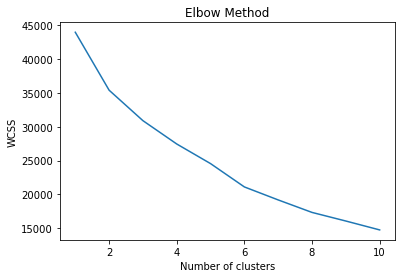

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airline)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_airline)

KMeans(n_clusters=4, random_state=42)

In [10]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [11]:
#Assign clusters to the data set
airline['clusterid_new'] = clusters_new.labels_

In [12]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-2.98478754e-01, -6.42142013e-02, -6.13747535e-01,
         3.28947498e-02, -6.07426678e-02, -5.17995326e-01,
        -4.91207604e-01, -1.86400083e-01, -1.98822948e-01,
        -2.07899699e-01, -3.48824498e-01],
       [ 1.19130578e+00,  1.02056447e+00,  9.95222056e-02,
         1.36680959e-01, -6.27665798e-02,  6.19234895e-01,
         1.55056071e+00,  3.42272158e+00,  3.67662420e+00,
         2.79402662e-01,  9.08902922e-01],
       [ 4.21685967e-01, -9.97266943e-03,  1.18816125e+00,
        -8.23662416e-02, -5.47626400e-02,  9.03299347e-01,
         7.41625184e-01, -9.44153225e-02, -1.04476981e-01,
         3.70515148e-01,  5.62946631e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [13]:
airline.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2245.555073,43563.850375,94.365969,1.215949,1.019345,1.000395,4646.641532,6.893012,198.932096,0.619029,3688.991709,0.201737
1,1,1731.196532,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249
2,2,1600.001565,116129.633020,136.613459,3.696401,1.002347,1.001565,38990.929577,18.726135,328.384194,0.978873,4886.052426,0.643192
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [14]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


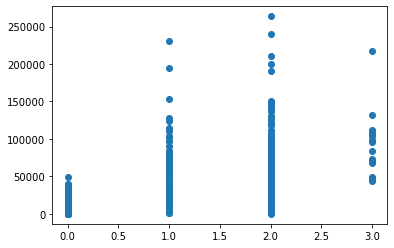

In [15]:
#plot cluster
plt.scatter(airline['clusterid_new'],airline['Bonus_miles'])

# DBSCAN clustering

In [16]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df=airline.iloc[:,1:]

In [19]:
array=df.values
array

array([[28143,     0,     1, ...,  7000,     0,     0],
       [19244,     0,     1, ...,  6968,     0,     0],
       [41354,     0,     1, ...,  7034,     0,     0],
       ...,
       [73597,     0,     3, ...,  1402,     1,     2],
       [54899,     0,     1, ...,  1401,     0,     0],
       [ 3016,     0,     1, ...,  1398,     0,     0]], dtype=int64)

In [20]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.41925974e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.41925974e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.41925974e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.39719585e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.41925974e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.41925974e-01]])

In [21]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=6)

In [22]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [24]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,2
3997,0


In [28]:
df_1 = pd.concat([df,cl],axis=1)
df_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [30]:
df_1.cluster

0       0
1       0
2       0
3       0
4      -1
       ..
3994    1
3995    1
3996    2
3997    0
3998    0
Name: cluster, Length: 3999, dtype: int64

In [42]:
df_1.drop(df_1.index[df_1['cluster']==-1],axis=0,inplace=True)
df_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


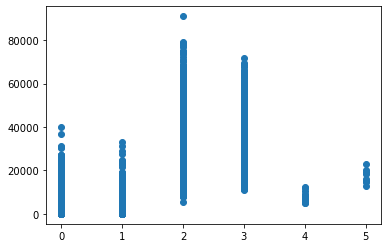

In [43]:
#plot cluster
plt.scatter(df_1['cluster'],df_1['Bonus_miles'])